In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv ('pre_post_full.csv')
data

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT1 RER,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER
0,1001,25.0,1.78,-2.9,-0.92,-1.5,-10.0,-10.0,0.0,3.7,...,0.08,-0.05,0.16,0.06,-0.05,1.90,-0.12,0.12,0.80,-0.07
1,1015,20.0,1.82,-2.5,-0.75,-4.0,3.0,1.0,3.0,-0.3,...,-0.14,0.00,0.04,-0.10,0.05,1.15,-0.15,0.16,0.61,-0.19
2,1018,18.0,1.82,2.6,0.78,2.0,-3.0,8.0,2.0,3.2,...,0.15,0.05,0.21,-0.08,0.00,0.11,0.00,-0.11,1.24,-0.09
3,1019,20.0,1.82,-6.3,-1.89,-9.0,7.0,3.0,0.0,-4.1,...,0.22,0.00,0.33,0.03,0.00,0.40,-0.01,-0.04,1.34,0.06
4,1020,19.0,1.85,0.0,0.00,0.0,0.0,-9.0,-4.0,-5.6,...,0.00,0.00,-0.82,0.03,0.00,0.98,-0.10,0.01,0.78,-0.02
5,1021,22.0,1.80,0.0,0.00,0.0,8.0,0.0,-4.0,-3.7,...,0.19,0.00,-0.49,0.05,0.00,-0.67,0.03,-0.14,-0.66,0.01
6,1022,19.0,1.87,0.9,0.26,-2.0,-7.0,-9.0,-21.0,-0.1,...,0.08,0.00,0.59,-0.04,0.00,0.07,0.00,-0.12,1.15,-0.10
7,1023,22.0,1.88,1.0,0.28,0.0,10.0,-5.0,3.0,-23.4,...,0.15,0.00,0.46,-0.05,0.00,0.29,-0.03,0.02,0.34,-0.01
8,1024,20.0,1.76,1.4,0.45,4.0,-12.0,-9.0,-13.0,0.7,...,-0.06,0.00,1.21,-0.11,0.00,1.64,-0.13,-0.29,0.02,-0.18
9,1026,18.0,1.71,0.1,0.03,1.5,3.0,-10.0,26.0,-1.0,...,0.08,-0.04,-0.29,0.16,0.00,0.22,-0.02,0.04,0.47,-0.05


In [3]:
data.columns

Index(['Number\n', 'Age\n(Years)', 'Height \n(m)', 'Weight\n(kg)',
       'BMI\n(kg/m^2)', 'Waist circumference \n(cm)',
       'Systolic Blood Pressure at rest (mmHg)',
       'Diastolic Blood Pressure at rest (mmHg)', 'Heart rate at rest\n(bpm)',
       'Body fat %', 'Skeletal muscle mass\n(kg)',
       'Skeletal Muscle Mass Index\n(kg/m^2)', 'Visceral fat\n(Litres) ',
       'Resting metabolic rate (kcal/day)', 'RQ', '%  Fat', '% Carbohydrate',
       'Hand grip strength - dominant\n(kg)',
       'Normative Percentiles \n(Wang et al., 2019)',
       'Hand grip strength - non-dominant\n(kg)',
       'Hand grip strength -  Combined Score\n(kg)',
       'Normative Percentiles (Hoffmann et al., 2019)', 'Back strength\n(kg)',
       'Back strength/kg', 'Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       

In [4]:
data1 = data.copy()
data1 = data[['Total Week vigorous PA\n(met.min) ',
       'Total Week moderate PA\n(met.min)',
       'Daily Active MET minutes M+V (met.min)',
       'Time Spent Sitting  Per week\n(hours)', 'Calories Burned/Day\n(kcal)',
       'Steps', 'Distance\n(km)', 'Minutes Sedentary',
       'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories\n(kcal)']]
data1

,Total Week vigorous PA\n(met.min),Total Week moderate PA\n(met.min),Daily Active MET minutes M+V (met.min),Time Spent Sitting Per week\n(hours),Calories Burned/Day\n(kcal),Steps,Distance\n(km),Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories\n(kcal)
0,-720.0,540.0,-167.14,0.0,-483.29,-2572.86,-0.31,-378.14,0.00,0.00,0.00,-1064.43
1,-720.0,600.0,176.14,17.5,-201.49,-257.54,0.40,-0.49,-33.60,-18.34,16.83,-144.83
2,1880.0,-240.0,184.79,17.5,-209.27,-1565.71,-0.64,335.10,-74.04,-1.13,-2.77,-238.41
3,0.0,0.0,-198.00,0.0,-70.73,-921.05,-1.00,30.45,-13.91,11.61,-15.98,-91.13
4,1120.0,1260.0,309.36,-3.5,148.29,-4767.14,-2.30,396.86,-103.14,-15.43,-13.00,-361.86
5,160.0,-640.0,30.43,14.0,-133.43,2946.71,1.41,96.57,85.00,10.57,-3.86,140.29
6,-1200.0,-5040.0,-1117.71,-63.0,-570.86,-5141.43,-4.72,53.29,-18.57,7.00,-41.71,-532.57
7,7200.0,3600.0,1769.14,0.0,226.71,3330.43,2.52,0.00,0.00,0.00,0.00,0.00
8,1440.0,-1800.0,-37.29,-10.5,-1150.00,-5404.00,-4.59,280.14,-110.86,-16.14,-9.00,-899.14
9,-3360.0,1400.0,-437.93,21.0,589.00,2667.86,1.39,128.86,63.63,26.97,-9.11,526.00


In [5]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data1)
data_scaled = pd.DataFrame(data_scaled[:,:], columns=data1.columns)
data_scaled

,Total Week vigorous PA\n(met.min),Total Week moderate PA\n(met.min),Daily Active MET minutes M+V (met.min),Time Spent Sitting Per week\n(hours),Calories Burned/Day\n(kcal),Steps,Distance\n(km),Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories\n(kcal)
0,-0.535399,0.186285,-0.362549,0.039684,-0.825101,-0.591418,0.039941,-2.353601,0.118757,-0.079598,0.543707,-1.799266
1,-0.535399,0.215443,0.171847,0.833360,-0.296818,0.169860,0.346519,-0.428036,-0.412922,-1.526171,1.791090,-0.040351
2,0.516518,-0.192764,0.185312,0.833360,-0.311403,-0.260267,-0.102552,1.283072,-1.052835,-0.168727,0.338404,-0.219342
3,-0.244099,-0.076134,-0.410590,0.039684,-0.051685,-0.048303,-0.258000,-0.270279,-0.101351,0.836144,-0.640676,0.062360
4,0.209035,0.536177,0.379235,-0.119051,0.358907,-1.312898,-0.819340,1.597975,-1.513307,-1.296644,-0.419809,-0.455464
5,-0.179365,-0.387149,-0.054985,0.674624,-0.169227,1.223418,0.782637,0.066854,1.463779,0.754114,0.257617,0.504996
6,-0.729599,-2.525376,-1.842335,-2.817549,-0.989267,-1.435965,-1.864296,-0.153823,-0.175090,0.472529,-2.547697,-0.781980
7,2.668903,1.673325,2.651725,0.039684,0.505919,1.349585,1.261935,-0.425538,0.118757,-0.079598,0.543707,0.236664
8,0.338502,-0.950863,-0.160407,-0.436522,-2.074967,-1.522298,-1.808162,1.002842,-1.635467,-1.352646,-0.123342,-1.483117
9,-1.603499,0.604211,-0.784098,0.992095,1.185096,1.131732,0.774001,0.231494,1.125625,2.047669,-0.131495,1.242742


In [6]:
wcss =[]

for i in range(1,12):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

wcss1 = pd.DataFrame(wcss)
wcss1.to_csv('Pre Post PA WCSS.csv')
wcss

[144.0,
 96.37438179602944,
 74.82070420382476,
 52.610030789203215,
 36.20111317592613,
 29.13016533019757,
 22.251352179533395,
 15.006607852517213,
 9.439241359599711,
 4.731698414669302,
 1.8038182452101372]

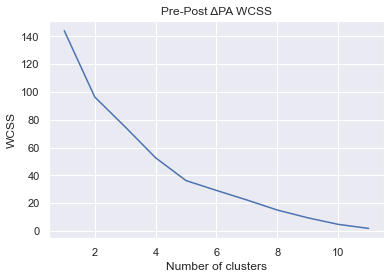

In [61]:
plt.plot(range(1,12),wcss)
plt.title('Pre-Post ΔPA WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('Pre Post PA WCSS.jpg')

In [74]:
data_scaled_2 = data_scaled.copy()
data_scaled_3 = data_scaled.copy()

In [75]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto")
data_scaled['clusters'] = clustering_kmeans.fit_predict(data_scaled)
data_scaled['clusters']

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     1
10    1
11    1
Name: clusters, dtype: int32

In [76]:
data_scaled['clusters'].to_csv('Pre Post PA Clusters.csv')

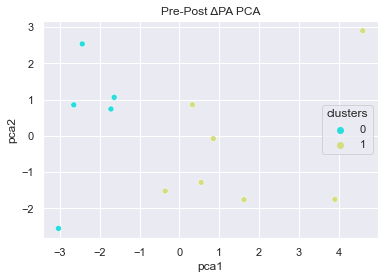

In [73]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results.to_csv('Pre-Post ΔPA PCAs.csv')

sns.scatterplot(x="pca1", y="pca2", palette=('rainbow'), hue=data_scaled['clusters'], data=results)
plt.title('Pre-Post ΔPA PCA')
plt.savefig('Pre Post PA PCA.jpg')
plt.show()

In [68]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_2)
clusters_new = data.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(data_scaled_2)

In [13]:
clusters_new

,Number\n,Age\n(Years),Height \n(m),Weight\n(kg),BMI\n(kg/m^2),Waist circumference \n(cm),Systolic Blood Pressure at rest (mmHg),Diastolic Blood Pressure at rest (mmHg),Heart rate at rest\n(bpm),Body fat %,...,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER,cluster_pred
0,1001,25.0,1.78,-2.9,-0.92,-1.5,-10.0,-10.0,0.0,3.7,...,-0.05,0.16,0.06,-0.05,1.90,-0.12,0.12,0.80,-0.07,1
1,1015,20.0,1.82,-2.5,-0.75,-4.0,3.0,1.0,3.0,-0.3,...,0.00,0.04,-0.10,0.05,1.15,-0.15,0.16,0.61,-0.19,1
2,1018,18.0,1.82,2.6,0.78,2.0,-3.0,8.0,2.0,3.2,...,0.05,0.21,-0.08,0.00,0.11,0.00,-0.11,1.24,-0.09,1
3,1019,20.0,1.82,-6.3,-1.89,-9.0,7.0,3.0,0.0,-4.1,...,0.00,0.33,0.03,0.00,0.40,-0.01,-0.04,1.34,0.06,2
4,1020,19.0,1.85,0.0,0.00,0.0,0.0,-9.0,-4.0,-5.6,...,0.00,-0.82,0.03,0.00,0.98,-0.10,0.01,0.78,-0.02,1
5,1021,22.0,1.80,0.0,0.00,0.0,8.0,0.0,-4.0,-3.7,...,0.00,-0.49,0.05,0.00,-0.67,0.03,-0.14,-0.66,0.01,2
6,1022,19.0,1.87,0.9,0.26,-2.0,-7.0,-9.0,-21.0,-0.1,...,0.00,0.59,-0.04,0.00,0.07,0.00,-0.12,1.15,-0.10,3
7,1023,22.0,1.88,1.0,0.28,0.0,10.0,-5.0,3.0,-23.4,...,0.00,0.46,-0.05,0.00,0.29,-0.03,0.02,0.34,-0.01,0
8,1024,20.0,1.76,1.4,0.45,4.0,-12.0,-9.0,-13.0,0.7,...,0.00,1.21,-0.11,0.00,1.64,-0.13,-0.29,0.02,-0.18,1
9,1026,18.0,1.71,0.1,0.03,1.5,3.0,-10.0,26.0,-1.0,...,-0.04,-0.29,0.16,0.00,0.22,-0.02,0.04,0.47,-0.05,2


In [14]:
clusters_new.to_csv('Pre Post PA  (5 clusters).csv')

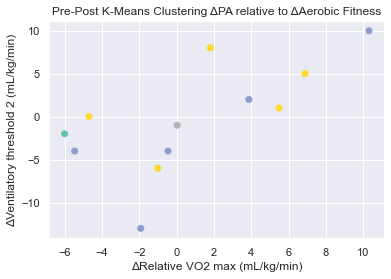

In [21]:
plt.scatter(clusters_new['Relative\nVO2 max\n(mL/kg/min)'],clusters_new['Ventilatory threshold 2\n(mL/kg/min)'], c=clusters_new['cluster_pred'],cmap='Set2')
plt.title('Pre-Post K-Means Clustering ΔPA relative to ΔAerobic Fitness')
plt.xlabel('ΔRelative VO2 max (mL/kg/min)')
plt.ylabel('ΔVentilatory threshold 2 (mL/kg/min)')
#add legend with class names
plt.savefig('Pre Post PA (4c).jpg')
plt.show()

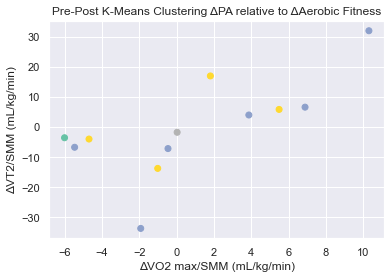

In [56]:
kmeans_new = KMeans(4)
kmeans_new.fit(data_scaled_3)
clusters_new_1 = data.copy()
clusters_new_1['cluster_pred'] = kmeans_new.fit_predict(data_scaled_3)

clusters_new_1.to_csv('Pre-Post PA K-Means by VO2max & VT2 (4 clusters).csv')

plt.scatter(clusters_new_1['Relative\nVO2 max\n(mL/kg/min)'],clusters_new_1['VT2/SMM\n(mL/kg/min)'],c=clusters_new_1['cluster_pred'],cmap='Set2')
plt.title('Pre-Post K-Means Clustering ΔPA relative to ΔAerobic Fitness')
plt.xlabel('ΔVO2 max/SMM (mL/kg/min)')
plt.ylabel('ΔVT2/SMM (mL/kg/min)')
plt.savefig('Pre Post PA K-Means by VO2max & VT2 relative to SMM (4c).jpg')
plt.show()
